In [147]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [148]:
df = pd.read_csv('Baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


For Reference: 
        
    Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned  Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

    Output: Number of predicted wins (W)

Observations:
    
    All the rows are in different ranges, so this has to be normalized. 
    
    The Output column W (Wins) is continuous, so we will have to use regression. 
    
    We can see that there are some '0' values in CG, so we will have to check that. 

In [149]:
df.shape

(30, 17)

In [150]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the columns except ERA are integers. 

In [151]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [152]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Finding the '0' values

In [153]:
col = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

In [154]:
for i in col:
    a = (df[i] == 0).any()
    if (a == True): 
        print(i, a)

CG True


Here we are not removing the 0 values because of the definition for CG (Shutouts) given below. 

Definition: 
    
    A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win. Because he recorded every out for his team and didn't allow a run, his team could only have won.

Therefore we can conclude that there are no null values.

### Trying to make sense of the dataset. 

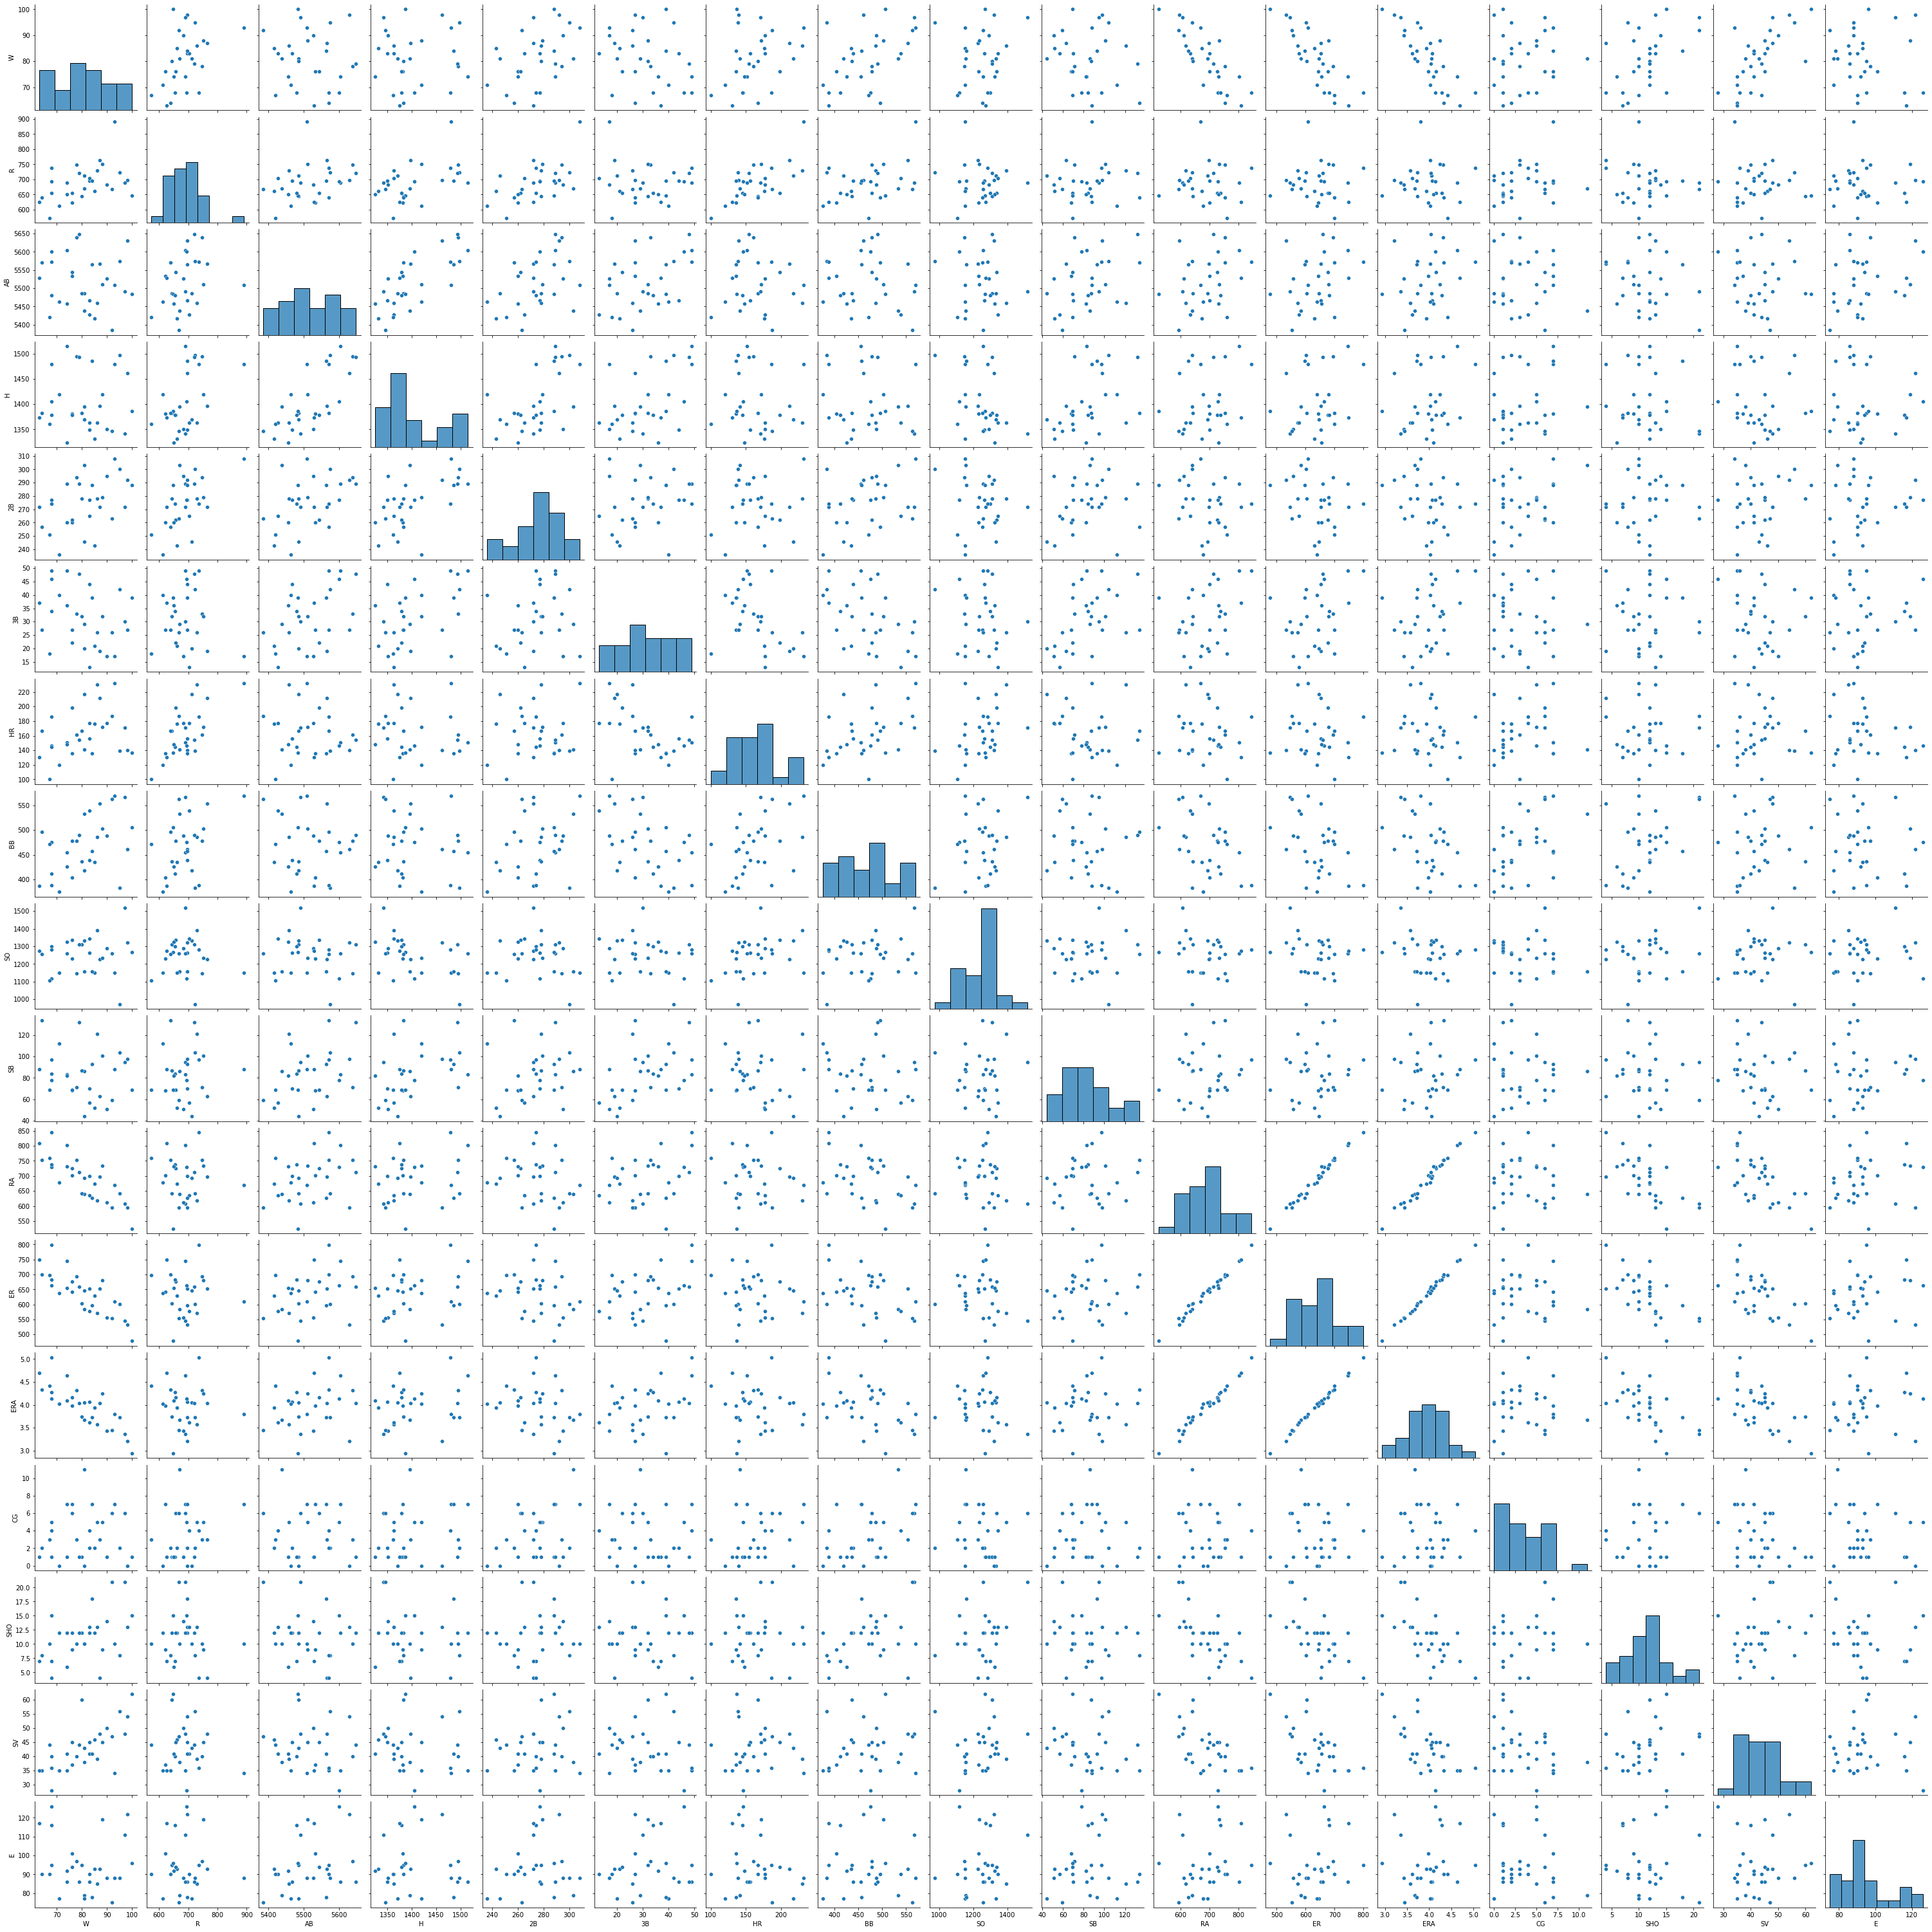

In [155]:
sb.pairplot(df)

We can see that W (Winnings) has a slightly negative relation with RA, ER, and ERA.

We can see that there isn't much relation between any other columns.

### Checking the skewness

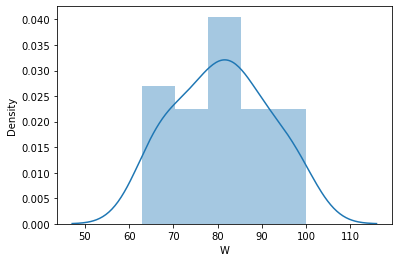

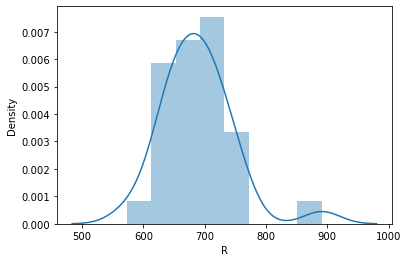

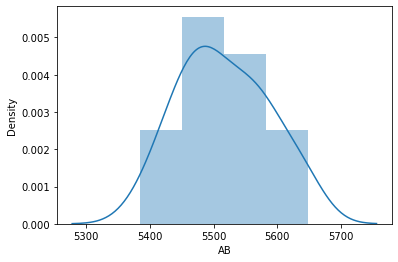

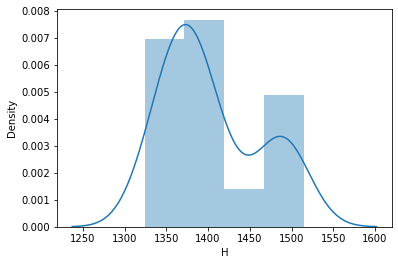

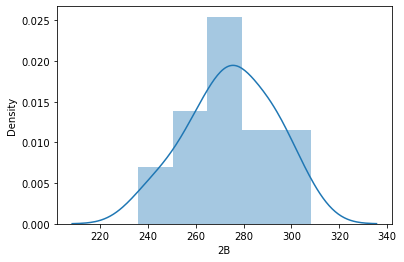

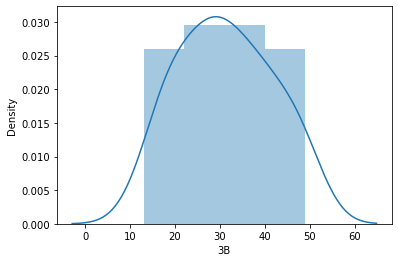

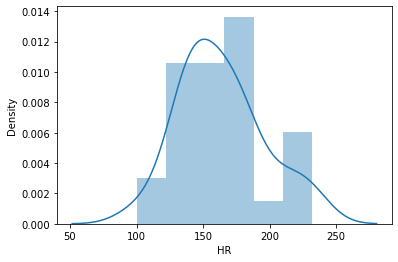

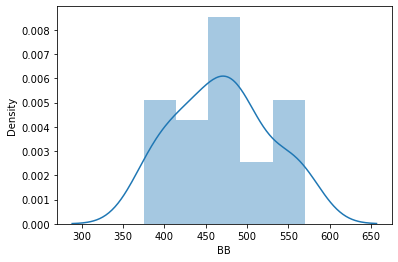

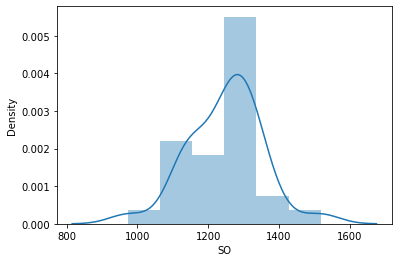

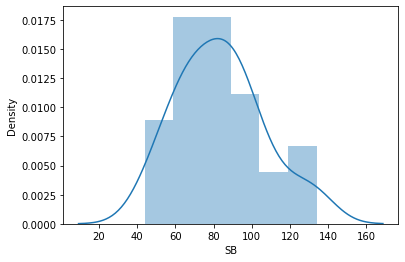

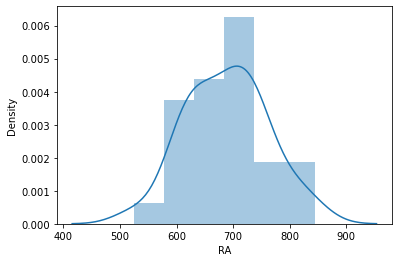

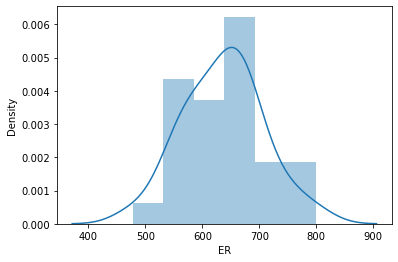

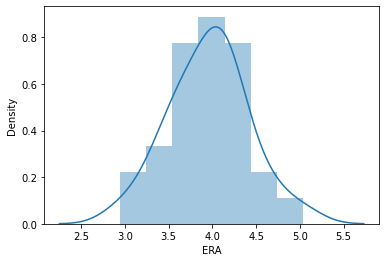

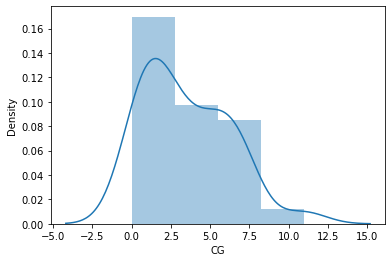

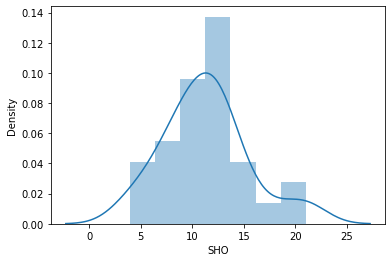

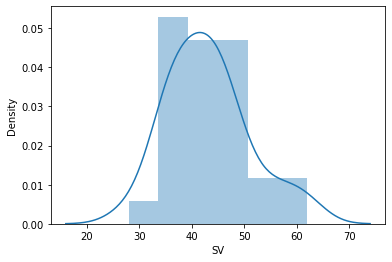

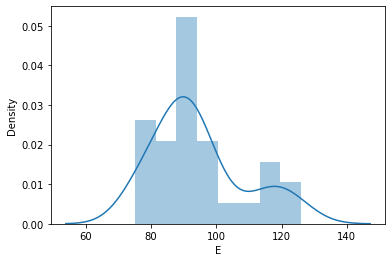

In [156]:
for i in col:  
    sb.distplot(df[i])
    plt.show()

We can see that none of the columns are skewed. Still, checking using the skew function. 

In [157]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Keeping the normal skewness value as +/- 0.5: 
    
    We can see that there is a small skewness in H, HR, CG, SV and E
    
    We can see high skewness in R (Runs)

### Summary

In [158]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

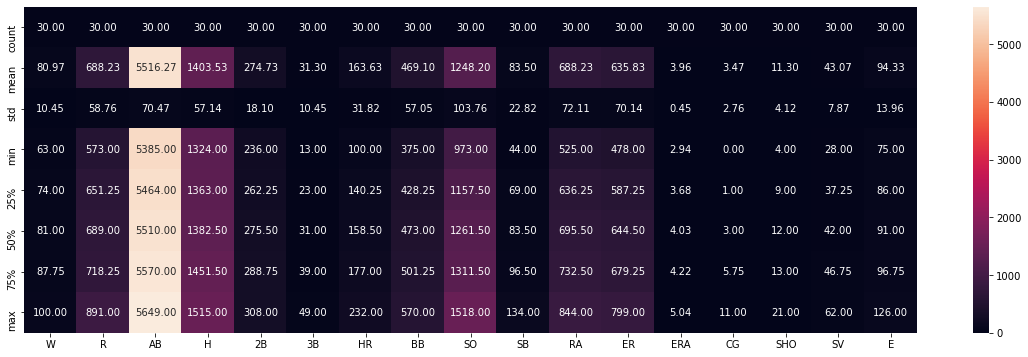

In [159]:
plt.figure(figsize = (20,6))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

With this graph we can see the columns with the highest value difference. 

### Checking the correlation.

In [160]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

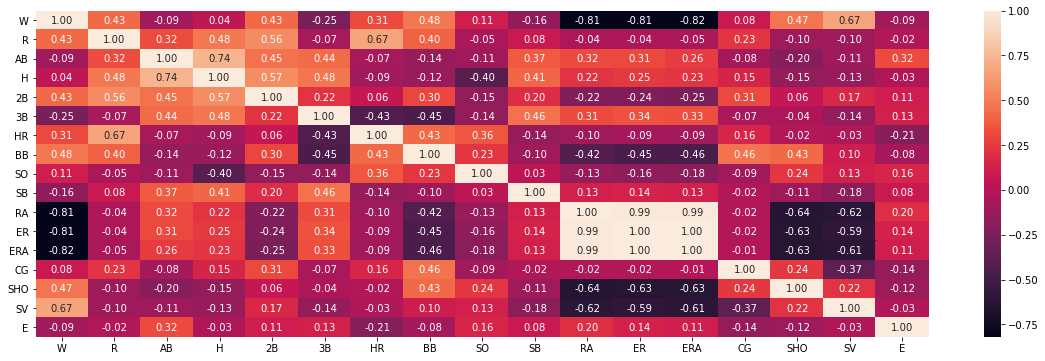

In [161]:
plt.figure(figsize = (20,6))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

<AxesSubplot:>

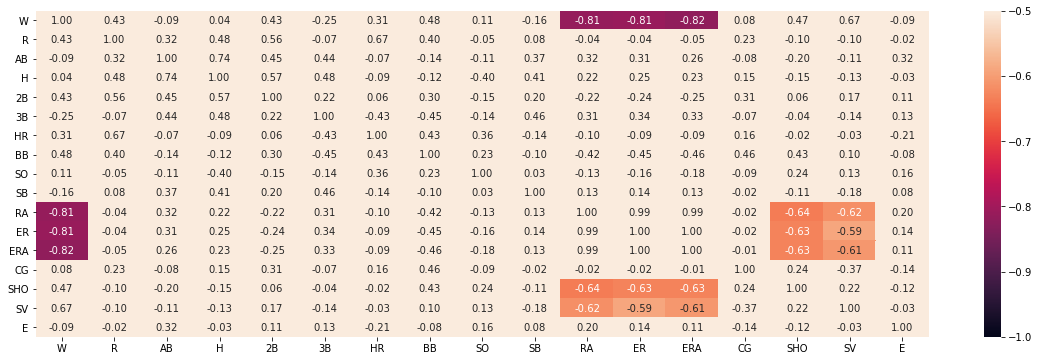

In [162]:
#Highlighting all the values lower than -0.5
#Plot to highlight high negative correlations.
plt.figure(figsize = (20,6))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = -0.5, vmax = -1)

Observations: 
    
    We can see that there is high negative correlation between RA, ER, and ERA with W.
    
    There is a high negative correlation between RA, ER, and ERA with both SV and SHO.

<AxesSubplot:>

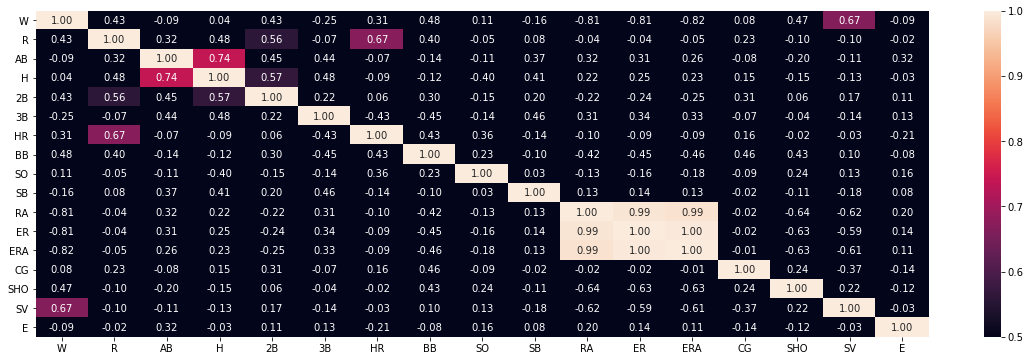

In [163]:
#Highlighting all the values lower than -0.5
#Plot to highlight high negative correlations.
plt.figure(figsize = (20,6))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.5, vmax = 1)

Observations: 
    
    We can see a high positive correlation between W and SV.
    
    There is a positve correlation between R and HR.
    
    There is a positve correlation between SV and W.
    
    There is a positve correlation between 2B and R.
    
    There is a positve correlation between 2B and H.
    
    There is a positve correlation between HR and R.
    
    There is a positve correlation for RA with ER and ERA. 

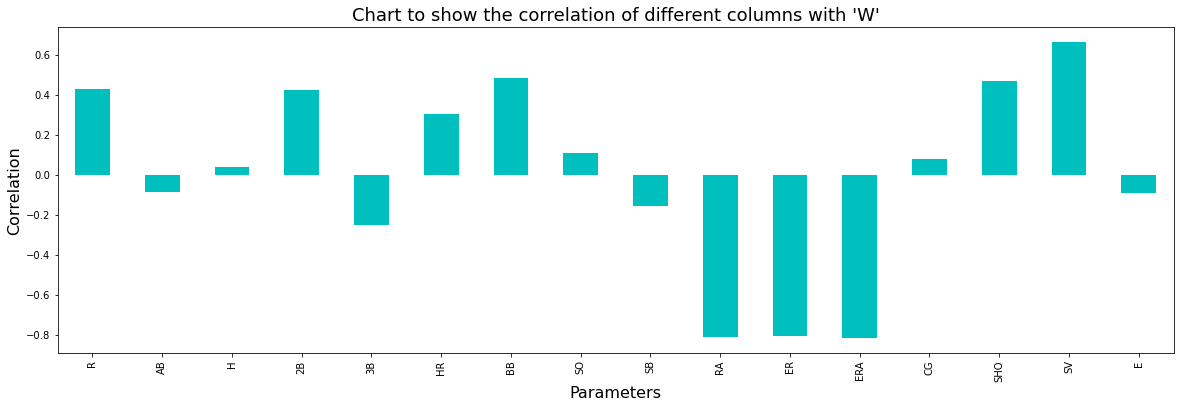

In [164]:
plt.figure(figsize = (20,6))
df.corr()['W'].drop(['W']).plot(kind = 'bar', color = 'c')
plt.xlabel('Parameters', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.title('Chart to show the correlation of different columns with \'W\'', fontsize = 18)
plt.show()

### Checking the outliers

<AxesSubplot:>

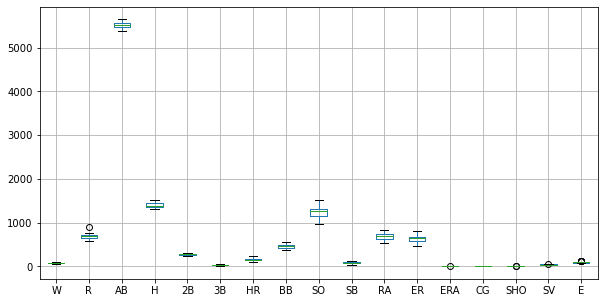

In [165]:
plt.figure(figsize = (10,5))
df.boxplot()

We can see that the datas are in different ranges, especially the AB. This dataset will have to be normalized using StandardScaler.

Since it's difficult to understand the outliers in this plot, we will have to plot all the columns separately. 

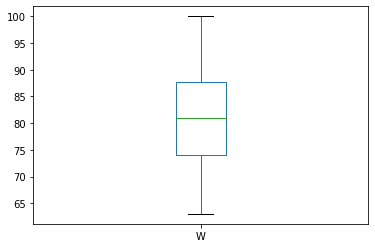

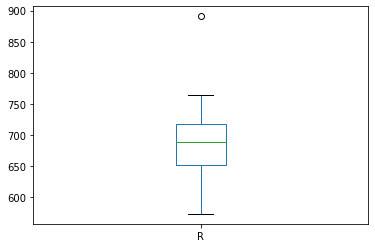

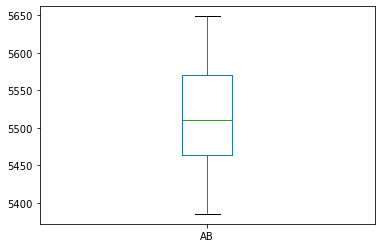

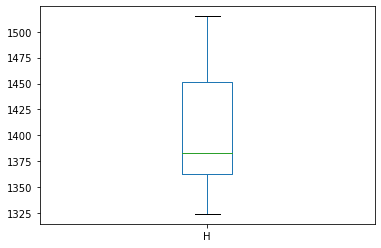

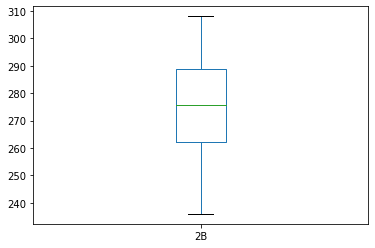

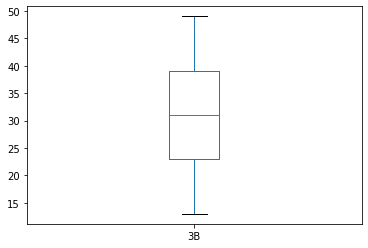

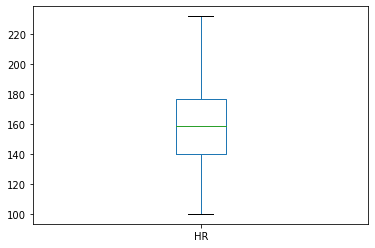

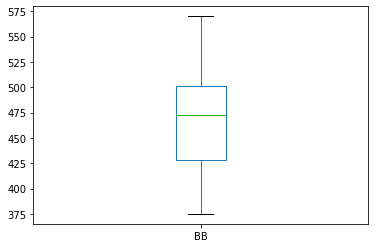

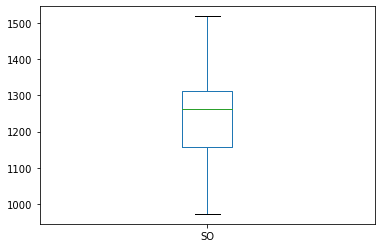

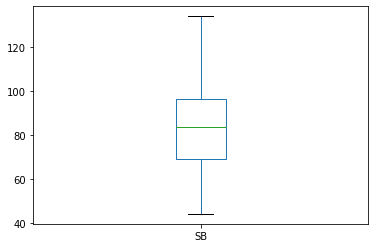

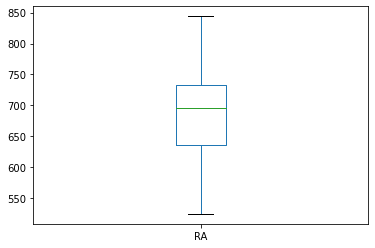

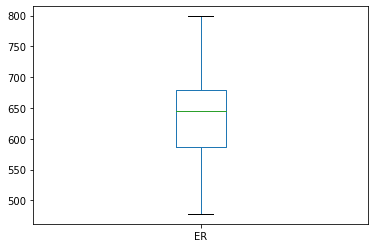

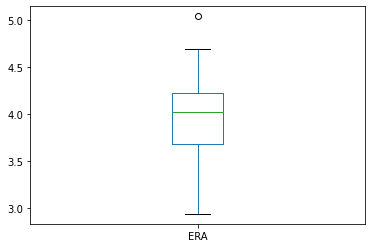

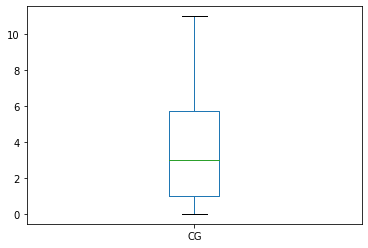

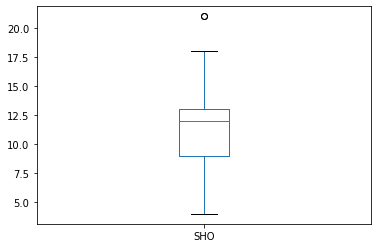

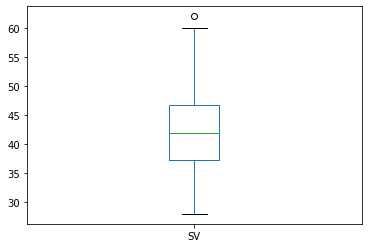

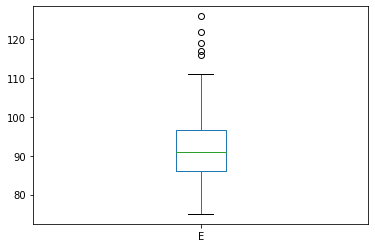

In [166]:
col = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']
for i in col:
    df[i].plot.box()
    plt.show()

Observations: 
    
    The only one serious outlier we can find is in the R (Runs) column. 
    
    There are some outliers in E, SV, SHO, and ERA.

### Checking outliers using Z score. 

In [167]:
from scipy.stats import zscore

In [168]:
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [169]:
z[5][1]

3.5096470447193067

We can confirm that this is an outlier, and we can remove it. 

In [170]:
df_new = df[(z<3).all(axis = 1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [171]:
df_new.shape

(29, 17)

In [172]:
#Checking the dataloss. 
loss = ((30-29)/30)*100
loss

3.3333333333333335

Since the data loss is only 3.33%, we can remove the outlier. 

In [173]:
df = df_new
df.shape

(29, 17)

### Standard Scaling the dataset

Since there are no categorical variables, we can StandardScale the complete dataset. 

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
ss = StandardScaler()

In [176]:
ds = ss.fit_transform(df)
df = ds
df.reshape(-1,1)

array([[ 1.41602548],
       [ 0.95939835],
       [ 0.83008422],
       [ 1.73830631],
       [ 1.55653766],
       [ 1.01084549],
       [-0.76586314],
       [-1.53635899],
       [-2.72762331],
       [ 0.9059529 ],
       [-0.66451353],
       [-0.51114812],
       [-0.51138828],
       [-0.50148589],
       [-0.81326172],
       [ 1.64315663],
       [-0.47109143],
       [ 0.23994704],
       [ 0.33114717],
       [-0.70283074],
       [-0.93869788],
       [ 0.20117132],
       [ 1.20891656],
       [-0.18138864],
       [-0.49502051],
       [ 0.12189552],
       [-0.58531515],
       [ 0.15463823],
       [ 0.23216082],
       [ 0.23895226],
       [-0.50148589],
       [ 0.15929869],
       [ 0.21100645],
       [-0.61489829],
       [ 0.04393396],
       [-0.27466646],
       [-1.10025314],
       [-0.10665604],
       [ 1.73332457],
       [-0.2766165 ],
       [-0.69710144],
       [ 1.25294051],
       [-0.9258657 ],
       [ 0.11645805],
       [-0.67839746],
       [-0

In [177]:
df = pd.DataFrame(df, columns = col)

In [178]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.416025,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.239947,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,0.043934,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-0.446099,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,-0.642112,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898


### Splitting X and Y

In [179]:
x = df.iloc[:, 1:17]
y = df.iloc[:, 0]

In [180]:
x.shape

(29, 16)

In [181]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898


In [182]:
y.shape

(29,)

In [183]:
y.head()

0    1.416025
1    0.239947
2    0.043934
3   -0.446099
4   -0.642112
Name: W, dtype: float64

### Importing the models

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [185]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [186]:
#Finding the best random state using loops.
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train, pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test, pred_test)}')
    print('\n')

At random state 0, the training accuracy is: 0.9868031054578322
At random state 0, the testing accuracy is: 0.14441013779800593


At random state 1, the training accuracy is: 0.9974609266155102
At random state 1, the testing accuracy is: 0.17252931228101587


At random state 2, the training accuracy is: 0.9694896685835841
At random state 2, the testing accuracy is: 0.2948421128133306


At random state 3, the training accuracy is: 0.9744325311641219
At random state 3, the testing accuracy is: 0.4880416264266133


At random state 4, the training accuracy is: 0.9817285995121358
At random state 4, the testing accuracy is: -11.297364983632509


At random state 5, the training accuracy is: 0.9742520613110048
At random state 5, the testing accuracy is: 0.251120993789854


At random state 6, the training accuracy is: 0.9920959515989276
At random state 6, the testing accuracy is: -0.7671063453273261


At random state 7, the training accuracy is: 0.9760561423628644
At random state 7, the testing

At random state 70, the training accuracy is: 0.9872518889467172
At random state 70, the testing accuracy is: 0.41526913038404045


At random state 71, the training accuracy is: 0.9965014186396036
At random state 71, the testing accuracy is: -0.6791617838043507


At random state 72, the training accuracy is: 0.9774286215484222
At random state 72, the testing accuracy is: -7.373201851770226


At random state 73, the training accuracy is: 0.9944830170525065
At random state 73, the testing accuracy is: -1.2054917573351163


At random state 74, the training accuracy is: 0.9987110969956378
At random state 74, the testing accuracy is: -0.22971040371374696


At random state 75, the training accuracy is: 0.9816380661816738
At random state 75, the testing accuracy is: 0.3685855930861195


At random state 76, the training accuracy is: 0.9702583912166532
At random state 76, the testing accuracy is: 0.569446552550877


At random state 77, the training accuracy is: 0.9806064417261902
At random stat

From the values given above, we can see that the best random state is in 34. 

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 34)

In [188]:
x_train.shape

(20, 16)

In [189]:
x_test.shape

(9, 16)

In [190]:
y_train.shape

(20,)

In [191]:
y_test.shape

(9,)

In [192]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_test = m.predict(x_test)
    pred_train = m.predict(x_train)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
    print('Mean squared error: ', mean_squared_error(y_test,pred_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
    print('R2 Score: ', r2_score(y_test,pred_test))
    print('\n\n')

LinearRegression()
Score:  0.9831209170819791
Mean absolute error:  0.4121475161440188
Mean squared error:  0.25154382984587614
Root mean squared error:  0.5015414537661629
R2 Score:  0.6810174252197387



KNeighborsRegressor()
Score:  0.6889545934530095
Mean absolute error:  0.6511989867883702
Mean squared error:  0.6643012472017908
Root mean squared error:  0.8150467760820791
R2 Score:  0.15759999999999985



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  1.0236238253864012
Mean squared error:  1.2849731727250115
Root mean squared error:  1.1335665718099717
R2 Score:  -0.6294736842105266



SVR()
Score:  0.95039251794585
Mean absolute error:  0.7058910128431151
Mean squared error:  0.734199533258701
Root mean squared error:  0.8568544411151179
R2 Score:  0.0689620267576363



RandomForestRegressor()
Score:  0.9484954065469906
Mean absolute error:  0.7170811585286653
Mean squared error:  0.7040913379881322
Root mean squared error:  0.8391015063674551
R2 Score:  0.1071422105

### Cross Validation

In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model: 
    print (m)
    i=[]
    for j in range (2,10):
        score = cross_val_score(m, x, y, cv = j)
        cv_mean = score.mean()
        i.append(cv_mean)
        a = i.index(max(i))+2
        b = max(i)
    print(f'At cross fold {a} the cv score is {b}')
    print('\n')

LinearRegression()
At cross fold 8 the cv score is 0.23285840924750648


KNeighborsRegressor()
At cross fold 4 the cv score is 0.5895512136904759


DecisionTreeRegressor()
At cross fold 4 the cv score is -0.07533931584882328


SVR()
At cross fold 4 the cv score is 0.31191073020101767


RandomForestRegressor()
At cross fold 4 the cv score is 0.5094771091509845


Lasso()
At cross fold 2 the cv score is -0.07921522120996982


Ridge()
At cross fold 2 the cv score is 0.5987784774439142


ElasticNet()
At cross fold 4 the cv score is 0.1605573556646794




The model with the least difference between the R2_score and CV score turned out to be Ridge method at CV = 2

### Re-running the best model once again

In [195]:
rd.fit(x_train, y_train)
rd.score(x_train, y_train)
pred_test = rd.predict(x_test)
pred_train = rd.predict(x_train)

In [196]:
print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
print('Mean squared error: ', mean_squared_error(y_test,pred_test))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
print('R2 Score: ', r2_score(y_test,pred_test))

Mean absolute error:  0.33899333987485974
Mean squared error:  0.25100282127837814
Root mean squared error:  0.5010018176397948
R2 Score:  0.6817034778489939


### GridSearch CV

In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10], 'random_state':list(range(0,10))}
rd = Ridge()
clf = GridSearchCV(rd, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [199]:
rd = Ridge(alpha = 10, random_state = 0)
rd.fit(x_train, y_train)
rd.score(x_train, y_train)
pred_rd = rd.predict(x_test)

rds = r2_score(y_test, pred_rd)
rds

0.6404593236236523

In [200]:
cv_score = cross_val_score(rd, x, y, cv = 2)
cv_mean = cv_score.mean()
cv_mean

0.5048598517193202

Using CV = 2 since that's the result which gave us  the best value when we ran the CV score.

### Plotting a graph for the training and testing scores

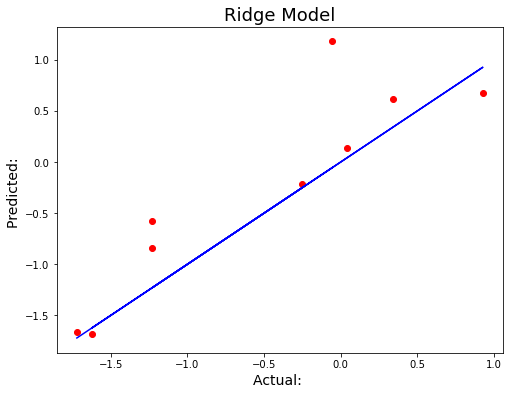

In [203]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('Ridge Model', fontsize = 18)
plt.show()

Going with the Ridge regression, we are getting the best score of 60% for this model. 

### Saving the model

In [205]:
import joblib
joblib.dump(rd, 'Baseball.obj')

['Baseball.obj']

In [206]:
final = joblib.load('Baseball.obj')
final.predict(x_train)

array([-0.57244924, -0.101762  ,  1.04516401,  1.4479512 ,  0.912577  ,
        1.15401222,  0.55940524,  0.05450824,  1.88535376, -0.4608798 ,
        0.05864574,  0.5429313 , -0.52781517, -0.79058939, -0.83463198,
       -0.93611605,  0.3015178 ,  0.74793164,  0.19287328,  0.12031295])

### Conclusion

In [207]:
conclusion = pd.DataFrame([final.predict(x_test)[:], pred_rd[:]], index = ['Predicted', 'Original'])

In [208]:
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,0.951133,-1.042458,0.353738,0.485357,1.078415,-0.422604,-0.95381,-0.036252,-1.250538
Original,0.951133,-1.042458,0.353738,0.485357,1.078415,-0.422604,-0.95381,-0.036252,-1.250538
